In [281]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, optimizers, regularizers
from sklearn import model_selection, preprocessing

from tensorflow. keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import accuracy_score

In [282]:
dataframe = pd.read_excel('book2.xlsx')
dataframe=dataframe.drop("Incident Date" , axis='columns')

In [283]:
print(dataframe.nunique())
print(dataframe.info())
dataframe

Calendar Year                       20
Portal Year                          1
Report ID                         1512
State Name                          48
State Abbreviation                  48
Incident County                    659
Operator Business Name             319
Operator ID                        319
Incident Cause Type                  1
Incident Cause SubType              23
Serious Incident Flag                2
Significant Incident Flag            1
# of Fatalities                      4
# of Injuries                        9
Total Property Damage             1537
# of Incidents                       1
Total Property Damage-Cur Yr $    1631
Commodity Spilled Amount bbls      495
Net Spill bbls                     349
System Sub Type                      6
Serious Incident Flag.1              2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  


,Calendar Year,Portal Year,Report ID,State Name,State Abbreviation,Incident County,Operator Business Name,Operator ID,Incident Cause Type,Incident Cause SubType,...,Significant Incident Flag,# of Fatalities,# of Injuries,Total Property Damage,# of Incidents,Total Property Damage-Cur Yr $,Commodity Spilled Amount bbls,Net Spill bbls,System Sub Type,Serious Incident Flag.1
0,2003,18/08/23,20030148,TEXAS,TX,HUTCHINSON,"NUSTAR LOGISTICS, L.P.",31454,MATERIAL/WELD/EQUIP FAILURE,RUPTURED OR LEAKING SEAL/PUMP PACKING,...,Yes,0,0,9500,1,1.433047e+04,362.000000,12.000000,HAZARDOUS LIQUID,No
1,2003,18/08/23,20030225,TEXAS,TX,JIM WELLS,"FLINT HILLS RESOURCES, LC",22855,MATERIAL/WELD/EQUIP FAILURE,RUPTURED OR LEAKING SEAL/PUMP PACKING,...,Yes,0,0,76801,1,1.158520e+05,100.000000,90.000000,HAZARDOUS LIQUID,No
2,2003,18/08/23,20030347,MONTANA,MT,CARTER,BELLE FOURCHE PIPELINE CO,1248,MATERIAL/WELD/EQUIP FAILURE,RUPTURED OR LEAKING SEAL/PUMP PACKING,...,Yes,0,0,6500,1,9.805058e+03,120.000000,5.000000,HAZARDOUS LIQUID,No
3,2003,18/08/23,20030275,TEXAS,TX,LIBERTY,MOBIL PIPE LINE COMPANY,12628,MATERIAL/WELD/EQUIP FAILURE,RUPTURED OR LEAKING SEAL/PUMP PACKING,...,Yes,0,0,410,1,6.184729e+02,13.000000,13.000000,HAZARDOUS LIQUID,No
4,2003,18/08/23,20030290,MISSISSIPPI,MS,HANCOCK,COLONIAL PIPELINE CO,2552,MATERIAL/WELD/EQUIP FAILURE,RUPTURED OR LEAKING SEAL/PUMP PACKING,...,Yes,0,0,213125,1,3.214928e+05,0.071429,0.071429,HAZARDOUS LIQUID,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,2022,18/08/23,20220029,ALABAMA,AL,PERRY,SOUTHERN NATURAL GAS CO,18516,MATERIAL/WELD/EQUIP FAILURE,MANUFACTURING-RELATED,...,Yes,0,0,1265788,1,1.274939e+06,0.000000,0.000000,GAS TRANSMISSION,No
1797,2022,18/08/23,20220081,NORTH CAROLINA,NC,MOORE,DIXIE PIPELINE COMPANY LLC,3445,MATERIAL/WELD/EQUIP FAILURE,MANUFACTURING-RELATED,...,Yes,0,0,732000,1,7.479600e+05,8.800000,8.800000,HAZARDOUS LIQUID,No
1798,2022,18/08/23,20220054,ALABAMA,AL,MARENGO,TRANSCONTINENTAL GAS PIPE LINE COMPANY,19570,MATERIAL/WELD/EQUIP FAILURE,MANUFACTURING-RELATED,...,Yes,0,0,5617741,1,5.734672e+06,0.000000,0.000000,GAS TRANSMISSION,No
1799,2022,18/08/23,20220172,OKLAHOMA,OK,PAYNE,"OSAGE PIPE LINE COMPANY, LLC",14391,MATERIAL/WELD/EQUIP FAILURE,MANUFACTURING-RELATED,...,Yes,0,0,36985428,1,3.779183e+07,7110.000000,542.880000,HAZARDOUS LIQUID,No


In [284]:
dataframe=dataframe.drop('Portal Year' , axis='columns')
dataframe=dataframe.drop('Report ID', axis='columns')
dataframe=dataframe.drop('Incident Cause Type', axis='columns')
dataframe=dataframe.drop('# of Incidents', axis='columns')
dataframe=dataframe.drop('State Name', axis='columns')
dataframe=dataframe.drop('Significant Incident Flag', axis='columns')
dataframe=dataframe.drop('Serious Incident Flag.1', axis='columns')
dataframe=dataframe.drop('Total Property Damage-Cur Yr $', axis='columns')
dataframe=dataframe.drop('Operator Business Name', axis='columns')

In [285]:
column_to_move = "Serious Incident Flag"

# Get the column and remove it from its current position
column = dataframe.pop(column_to_move)

# Insert the column at the last position
dataframe.insert(dataframe.shape[1], column_to_move, column)

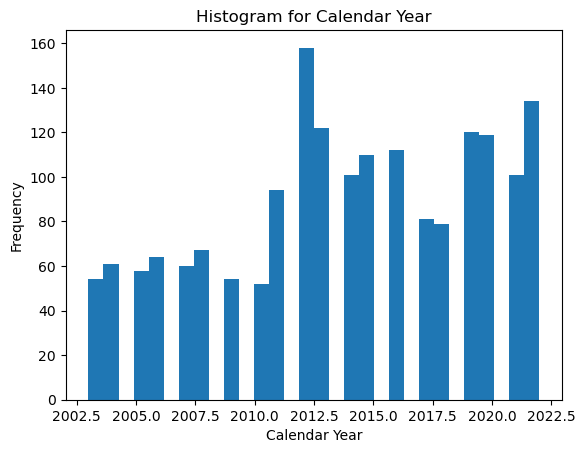

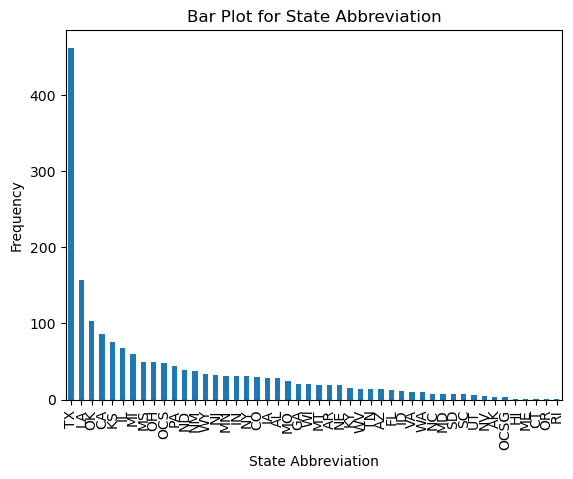

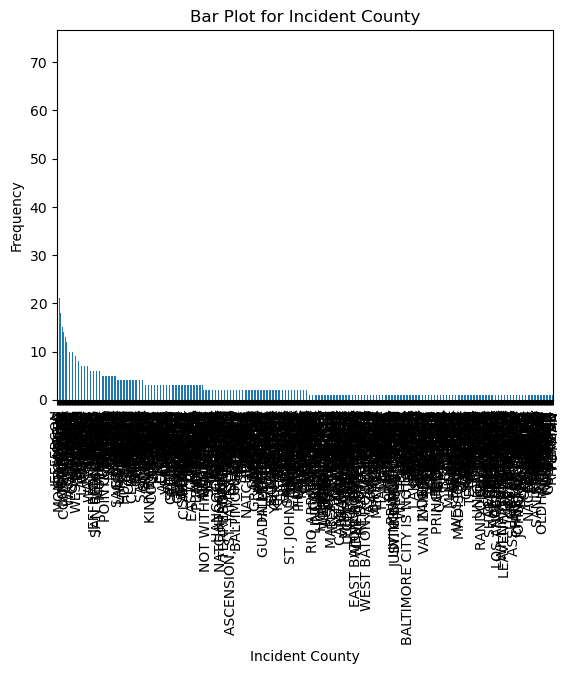

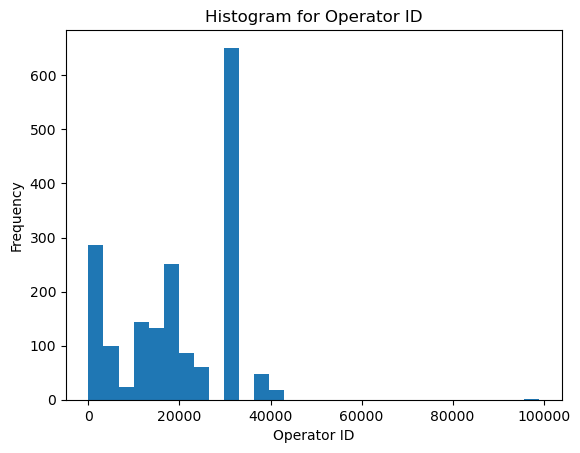

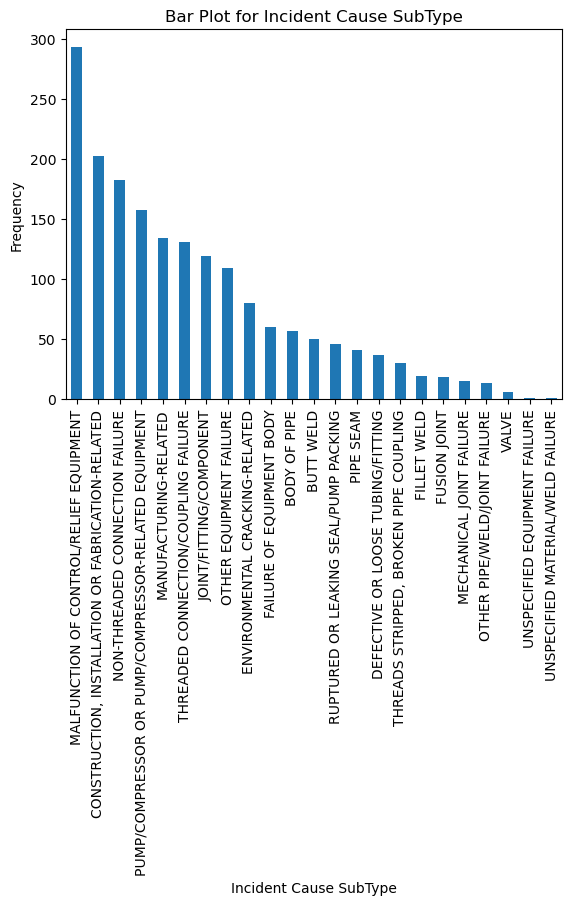

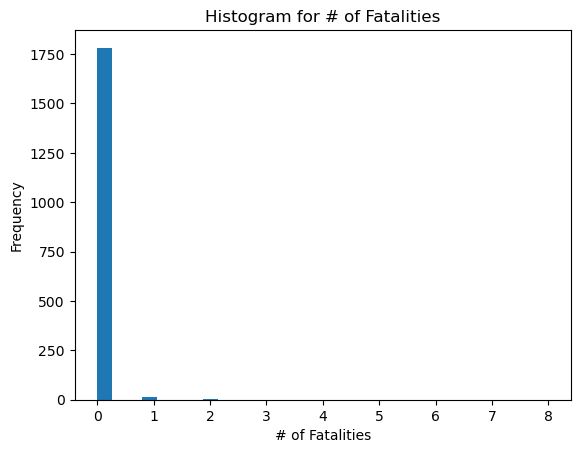

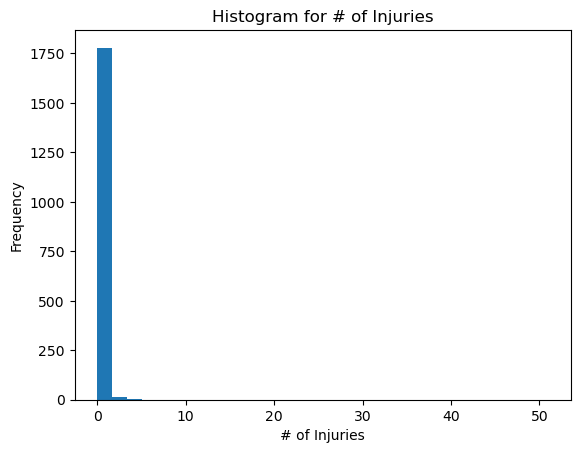

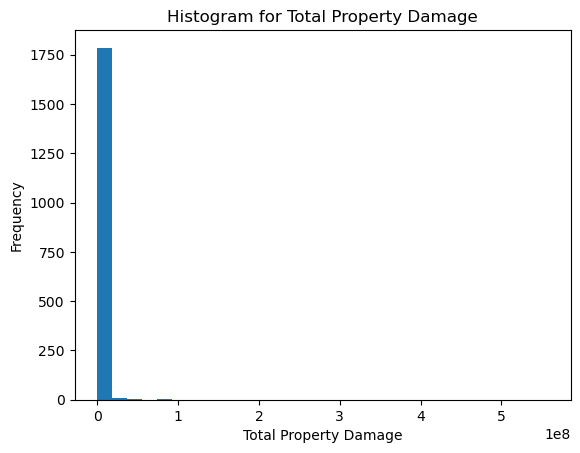

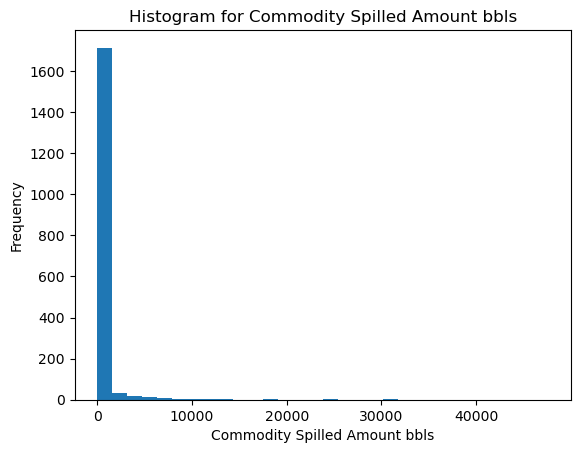

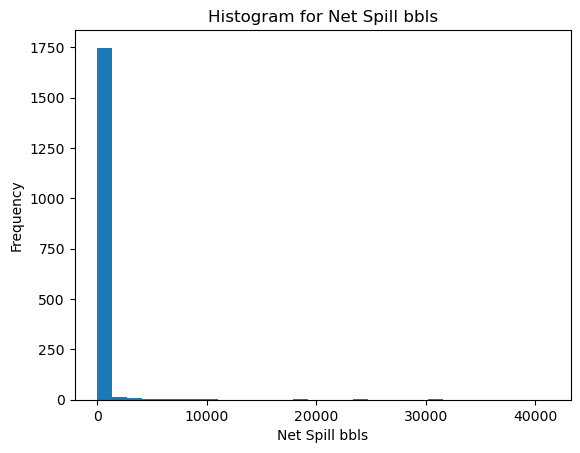

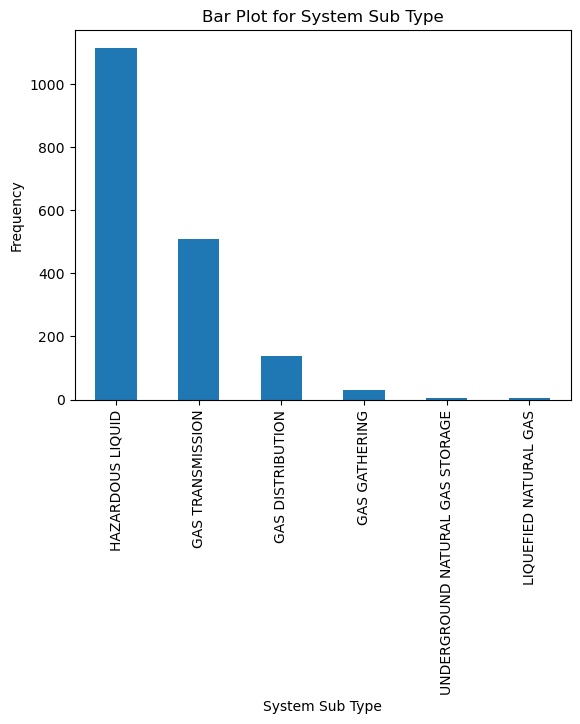

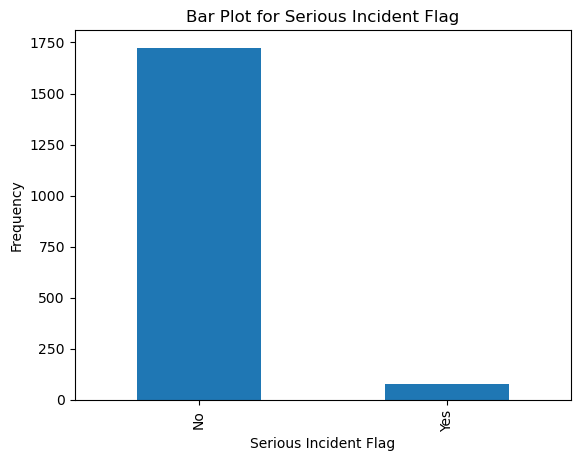

In [286]:
for column in dataframe.columns:
    plt.figure()
    if dataframe[column].dtype == 'object':
        
        dataframe[column].value_counts().plot(kind='bar')
        plt.title(f'Bar Plot for {column}')
    else:
        
        dataframe[column].plot(kind='hist', bins=30)  
        plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [287]:
for column in dataframe.columns:
    if dataframe[column].dtype == 'object':
        print(column)

State Abbreviation
Incident County
Incident Cause SubType
System Sub Type
Serious Incident Flag


In [288]:
country=LabelEncoder()
for column in dataframe.columns:
    if dataframe[column].dtype == 'object':
        dataframe[column]=country.fit_transform (dataframe[column])

In [289]:
dataframe

,Calendar Year,State Abbreviation,Incident County,Operator ID,Incident Cause SubType,# of Fatalities,# of Injuries,Total Property Damage,Commodity Spilled Amount bbls,Net Spill bbls,System Sub Type,Serious Incident Flag
0,2003,41,286,31454,17,0,0,9500,362.000000,12.000000,3,0
1,2003,41,302,22855,17,0,0,76801,100.000000,90.000000,3,0
2,2003,23,97,1248,17,0,0,6500,120.000000,5.000000,3,0
3,2003,41,351,12628,17,0,0,410,13.000000,13.000000,3,0
4,2003,22,255,2552,17,0,0,213125,0.071429,0.071429,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1796,2022,1,472,18516,10,0,0,1265788,0.000000,0.000000,2,0
1797,2022,24,419,3445,10,0,0,732000,8.800000,8.800000,3,0
1798,2022,1,380,19570,10,0,0,5617741,0.000000,0.000000,2,0
1799,2022,34,466,14391,10,0,0,36985428,7110.000000,542.880000,3,0


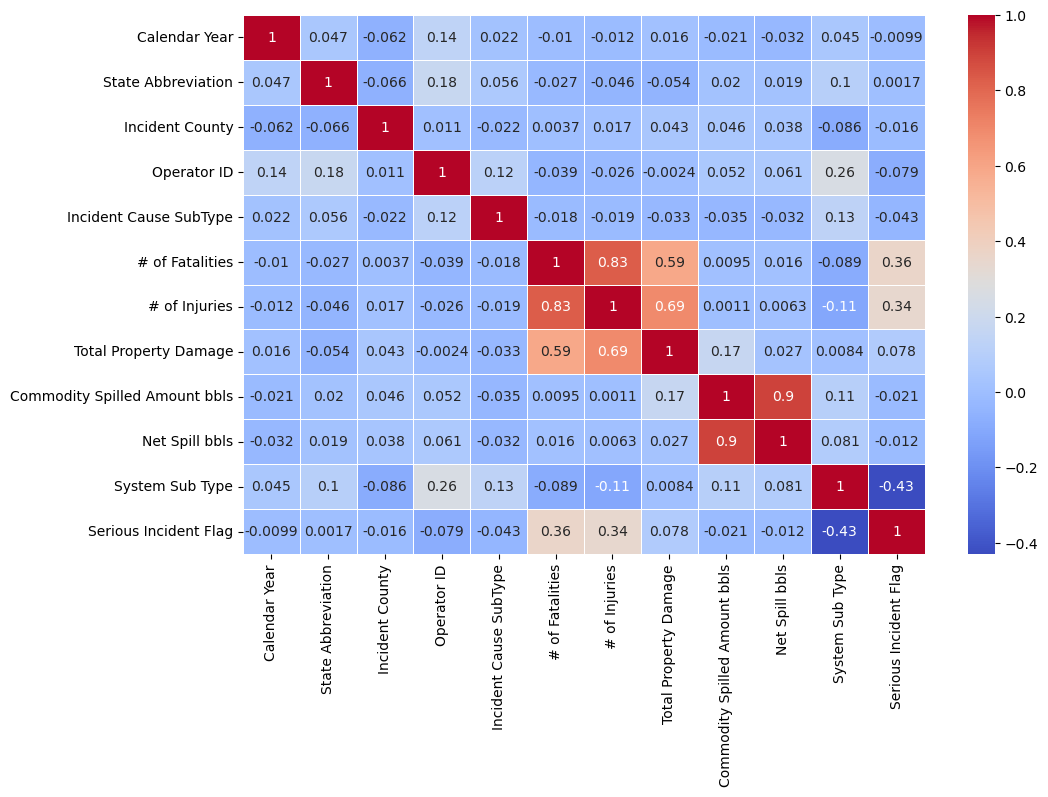

In [290]:
fig, ax = plt.subplots(figsize=(11,7))
sns.heatmap(dataframe.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

plt.show()

In [331]:
z_score_scaler = StandardScaler()
selected_columns = [col for col in dataframe.columns if dataframe[col].nunique() > 2]

dataframe_standardized = pd.DataFrame(z_score_scaler.fit_transform(dataframe[selected_columns]), columns=selected_columns)
for col in dataframe.columns:
    if dataframe[col].nunique() == 2:
        dataframe_standardized[col] = dataframe[col]

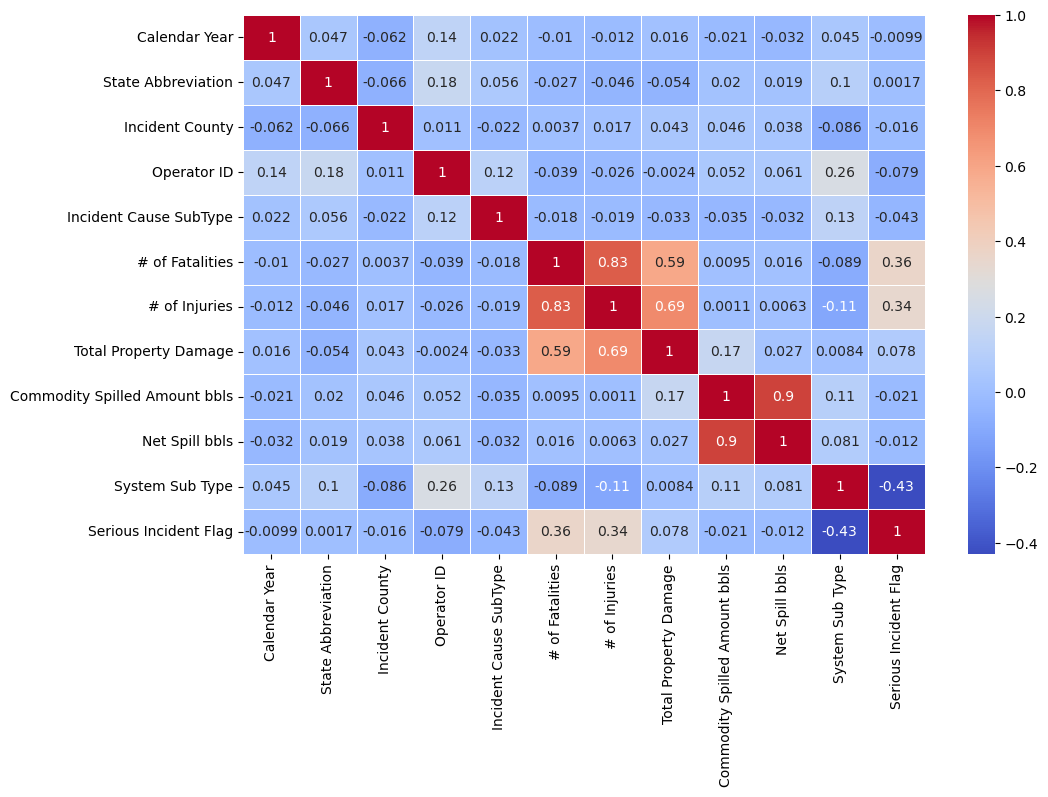

In [332]:
fig, ax = plt.subplots(figsize=(11,7))
sns.heatmap(dataframe_standardized.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

plt.show()

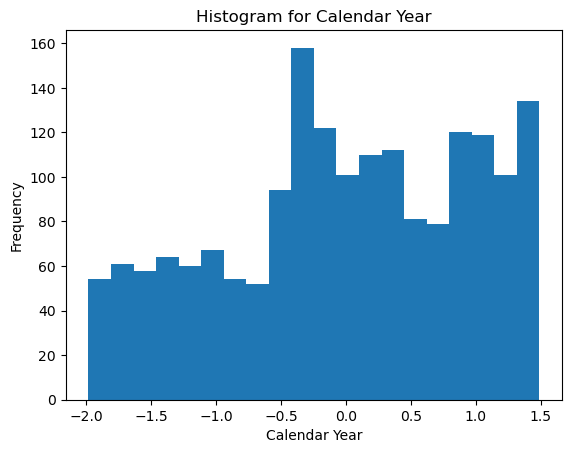

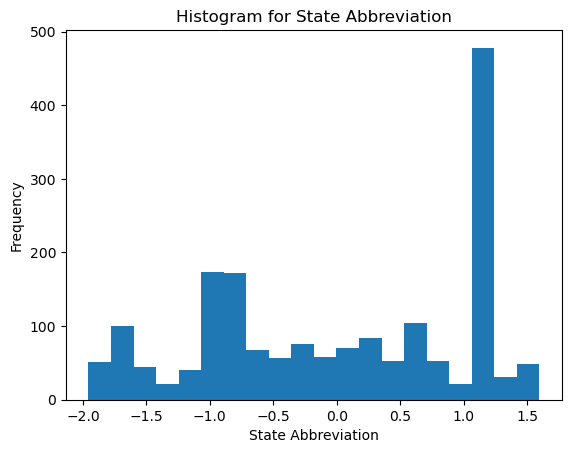

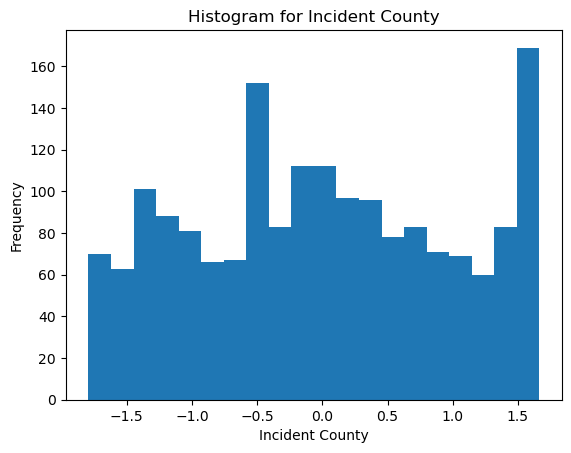

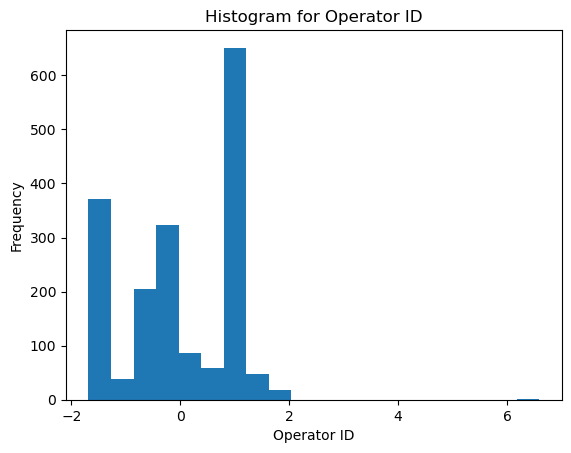

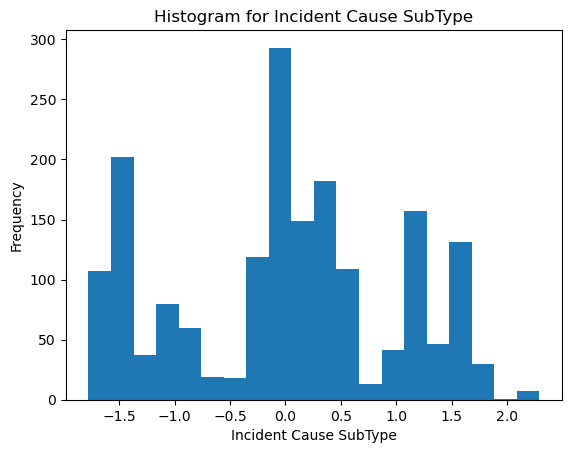

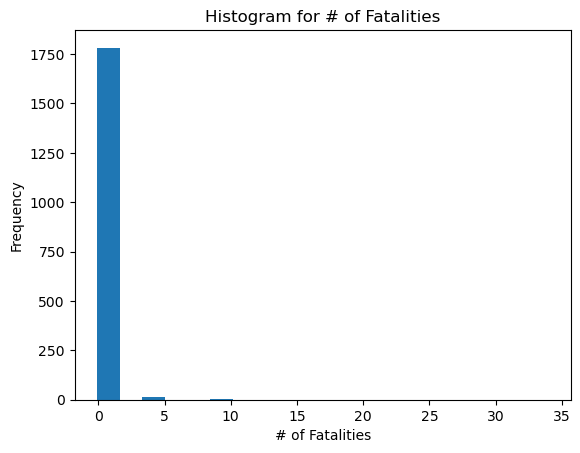

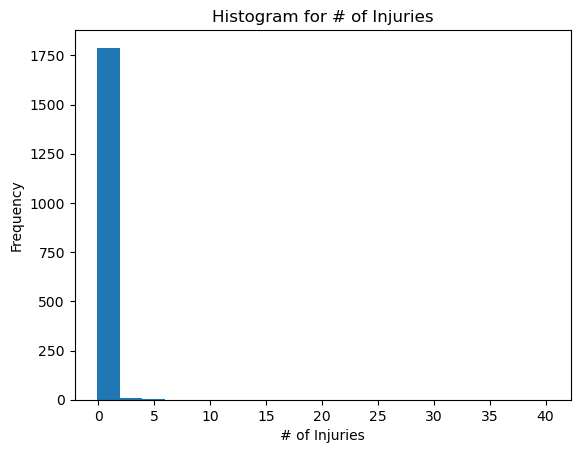

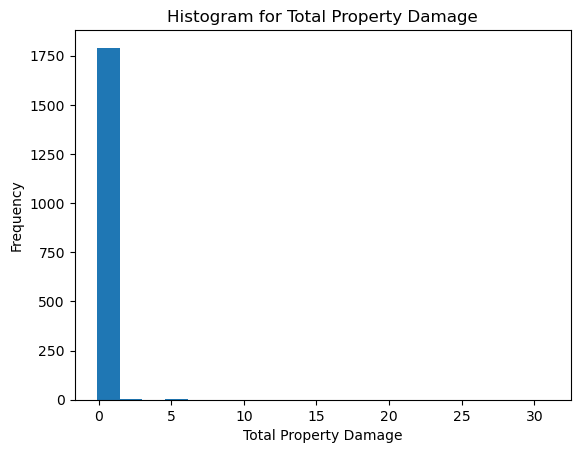

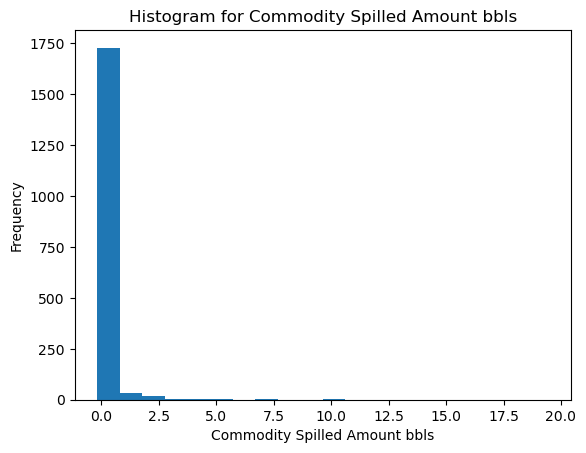

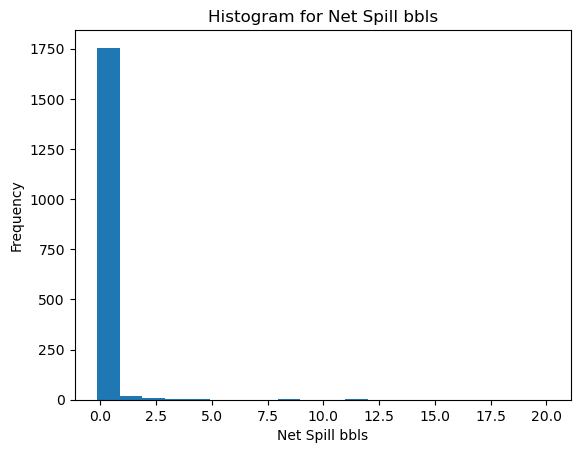

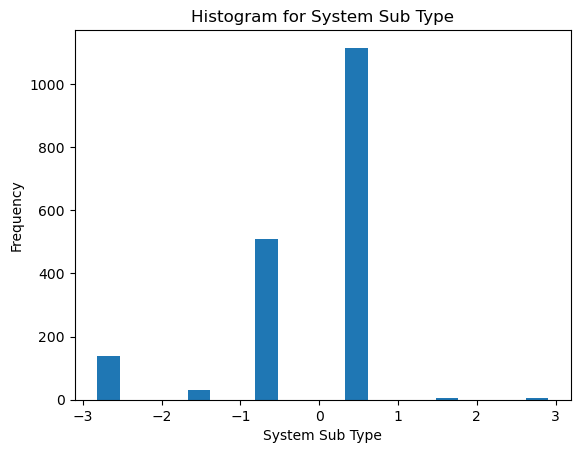

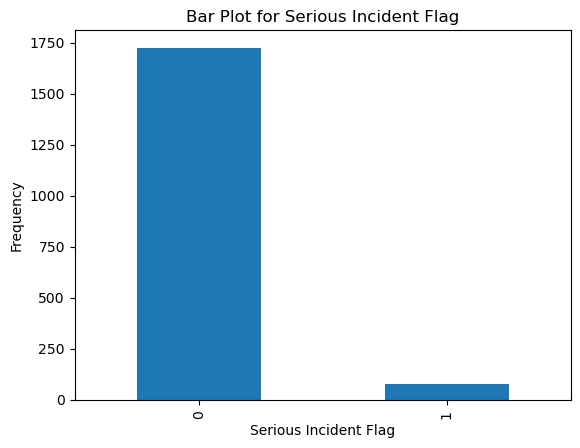

In [333]:
for column in dataframe_standardized.columns:
    plt.figure()
    if dataframe_standardized[column].nunique() == 2:
        
        dataframe_standardized[column].value_counts().plot(kind='bar')
        plt.title(f'Bar Plot for {column}')
    else:
        
        dataframe_standardized[column].plot(kind='hist', bins=20)  
        plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [302]:
print(dataframe.columns)

Index(['Calendar Year', 'State Abbreviation', 'Incident County', 'Operator ID',
       'Incident Cause SubType', '# of Fatalities', '# of Injuries',
       'Total Property Damage', 'Commodity Spilled Amount bbls',
       'Net Spill bbls', 'System Sub Type', 'Serious Incident Flag'],
      dtype='object')


In [334]:


given_column = 'Serious Incident Flag'

# Calculate the correlation matrix
correlation_matrix = dataframe_standardized.corr()

# Get the absolute values of the correlation with the given column
correlation_with_given_column = correlation_matrix[given_column].abs()

# Sort the columns based on the correlation values and select the top 5
top_5_columns = correlation_with_given_column.sort_values(ascending=False).head(6).index[1:]

# Display the top 5 columns
print("Top 5 columns based on correlation with", given_column, ":", top_5_columns)

# Select the columns in the original DataFrame
selected_columns = dataframe_standardized[top_5_columns]

# Display the DataFrame with the selected columns
print(selected_columns)

Top 5 columns based on correlation with Serious Incident Flag : Index(['System Sub Type', '# of Fatalities', '# of Injuries', 'Operator ID',
       'Total Property Damage'],
      dtype='object')
      System Sub Type  # of Fatalities  # of Injuries  Operator ID  \
0            0.616274        -0.075619      -0.071971     0.941734   
1            0.616274        -0.075619      -0.071971     0.222835   
2            0.616274        -0.075619      -0.071971    -1.583567   
3            0.616274        -0.075619      -0.071971    -0.632170   
4            0.616274        -0.075619      -0.071971    -1.474550   
...               ...              ...            ...          ...   
1796        -0.527963        -0.075619      -0.071971    -0.139917   
1797         0.616274        -0.075619      -0.071971    -1.399892   
1798        -0.527963        -0.075619      -0.071971    -0.051800   
1799         0.616274        -0.075619      -0.071971    -0.484778   
1800        -2.816436        -0.07

In [335]:
x=selected_columns
y=dataframe_standardized['Serious Incident Flag']


In [336]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [337]:
y_train


513     0
81      0
598     0
380     0
1525    0
       ..
1130    0
1294    0
860     0
1459    0
1126    0
Name: Serious Incident Flag, Length: 1260, dtype: int64

Epoch 1/50
40/40 [==============================] - 0s 382us/step - loss: 0.7095 - accuracy: 0.3960
Epoch 2/50
40/40 [==============================] - 0s 357us/step - loss: 0.6972 - accuracy: 0.5929
Epoch 3/50
40/40 [==============================] - 0s 294us/step - loss: 0.6853 - accuracy: 0.6214
Epoch 4/50
40/40 [==============================] - 0s 271us/step - loss: 0.6735 - accuracy: 0.6508
Epoch 5/50
40/40 [==============================] - 0s 289us/step - loss: 0.6620 - accuracy: 0.6571
Epoch 6/50
40/40 [==============================] - 0s 293us/step - loss: 0.6507 - accuracy: 0.6833
Epoch 7/50
40/40 [==============================] - 0s 290us/step - loss: 0.6396 - accuracy: 0.7468
Epoch 8/50
40/40 [==============================] - 0s 264us/step - loss: 0.6288 - accuracy: 0.7762
Epoch 9/50
40/40 [==============================] - 0s 295us/step - loss: 0.6182 - accuracy: 0.7944
Epoch 10/50
40/40 [==============================] - 0s 288us/step - loss: 0.6077 - accuracy: 0.8151

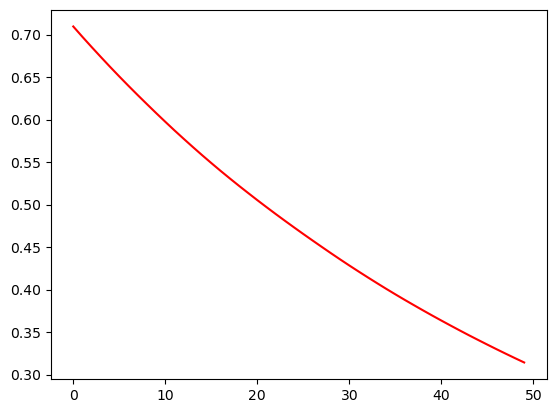

In [338]:
# create a sequential model
model = models.Sequential()
# add the hidden layer
model.add(layers.Dense(input_dim=5,
                       units=10, 
                       activation='relu'))

# add the output layer
model.add(layers.Dense(
                       units=1,
                       activation='sigmoid'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])


# train the parameters
history = model.fit(x_train, y_train, epochs=50, batch_size=32)

# evaluate accuracy
train_acc = model.evaluate(x_train, y_train, batch_size=32)[1]
test_acc = model.evaluate(x_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

In [318]:
model.evaluate(x_test, y_test)

17/17 [==============================] - 0s 455us/step - loss: -8.5858 - accuracy: 0.0000e+00


[-8.585776329040527, 0.0]

In [319]:
model.summary()
for layer in model.layers:
    if layer.trainable:
        print(f"Weights of {layer.name}: {layer.get_weights()}")

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_82 (Dense)            (None, 10)                60        
                                                                 
 dense_83 (Dense)            (None, 1)                 11        
                                                                 
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________
Weights of dense_82: [array([[ 2.577206  ,  1.7222294 , -0.7380702 ,  0.52243185, -1.1540513 ,
        -0.70066935, -0.8479749 ,  0.97910124, -0.9931596 , -0.5448017 ],
       [-0.65866506, -0.10350761,  0.7322998 , -2.654088  ,  1.0951755 ,
         0.996996  ,  1.4444593 , -0.15204042,  0.9469056 ,  0.6904499 ],
       [-0.46863025, -0.79328436,  0.740496  , -1.4675651 ,  0.94370943,
         0.7945544 ,  0.8903569 , -1.0853939 ,  1.0037985 ,  1.5